In [2]:
!cat outliers/enron_outliers.py

#!/usr/bin/python

import pickle
import sys
import matplotlib.pyplot
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit


### read in data dictionary, convert to numpy array
data_dict = pickle.load( open("../final_project/final_project_dataset.pkl", "r") )
features = ["salary", "bonus"]
data = featureFormat(data_dict, features)


### your code below





In [61]:
import pickle
import sys
import matplotlib.pyplot
import numpy as np
sys.path.append("tools/")
from feature_format import featureFormat, targetFeatureSplit


### read in data dictionary, convert to numpy array
data_dict = pickle.load( open("final_project/final_project_dataset.pkl", "r") )
if 'TOTAL' in data_dict:
    del data_dict['TOTAL']
features = ["salary", "bonus"]
data = featureFormat(data_dict, features)
inputs=np.asarray(data[:,0]).reshape(-1,1)
labels=np.asarray(data[:,1]).reshape(-1,1)

In [62]:
from sklearn.linear_model import LinearRegression
regd=LinearRegression()
regd.fit(inputs, labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

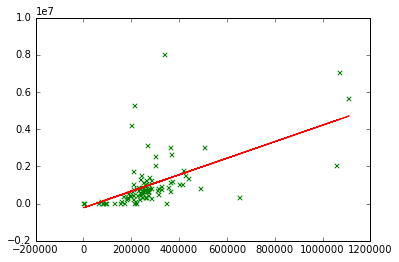

In [63]:
%matplotlib inline
matplotlib.pyplot.scatter(np.asarray(inputs.tolist()),np.asarray(labels.tolist()),color='g',marker='x')
matplotlib.pyplot.plot( inputs,regd.predict(inputs),'r')

In [113]:
predictions=regd.predict(inputs)
rss=zip(inputs,labels,inputs+labels)
rss=sorted(rss ,key=lambda x: x[1],reverse=True)
rss=sorted(rss ,key=lambda x: x[0],reverse=True)
#rss=sorted(rss ,key=lambda x: x[2],reverse=True)
    #10%
#cleaned_data = rss[int(.1*len(predictions)):]

In [114]:
rss[:10]

[(array([ 1111258.]), array([ 5600000.]), array([ 6711258.])),
 (array([ 1072321.]), array([ 7000000.]), array([ 8072321.])),
 (array([ 1060932.]), array([ 2000000.]), array([ 3060932.])),
 (array([ 655037.]), array([ 300000.]), array([ 955037.])),
 (array([ 510364.]), array([ 3000000.]), array([ 3510364.])),
 (array([ 492375.]), array([ 800000.]), array([ 1292375.])),
 (array([ 440698.]), array([ 1300000.]), array([ 1740698.])),
 (array([ 428780.]), array([ 1500000.]), array([ 1928780.])),
 (array([ 420636.]), array([ 1750000.]), array([ 2170636.])),
 (array([ 415189.]), array([ 1000000.]), array([ 1415189.]))]

In [116]:
n=1
for d in data_dict.items():
    if d[1]['salary']==rss[n][0][0] or d[1]['bonus']==rss[n][1][0]:
        print d 

('LAY KENNETH L', {'salary': 1072321, 'to_messages': 4273, 'deferral_payments': 202911, 'total_payments': 103559793, 'exercised_stock_options': 34348384, 'bonus': 7000000, 'restricted_stock': 14761694, 'shared_receipt_with_poi': 2411, 'restricted_stock_deferred': 'NaN', 'total_stock_value': 49110078, 'expenses': 99832, 'loan_advances': 81525000, 'from_messages': 36, 'other': 10359729, 'from_this_person_to_poi': 16, 'poi': True, 'director_fees': 'NaN', 'deferred_income': -300000, 'long_term_incentive': 3600000, 'email_address': 'kenneth.lay@enron.com', 'from_poi_to_this_person': 123})
